# Bias & Variance

- StatQuest Video: https://youtu.be/EuBBz3bI-aA

A fundamental goal in machine learning is to create models that can accurately predict outcomes. This involves finding a balance between two key concepts: bias and variance.

*   **Bias** refers to a model's inability to capture the true relationship between data points. 
    - A model with high bias is too simple and cannot replicate the complexity of the data, such as a straight line trying to fit a curved pattern.
*   **Variance** describes the model's sensitivity to the specific data it was trained on. 
    - A model with high variance is overly complex and fits the training data too closely, including the noise. This results in poor performance on new, unseen data.

### The Bias-Variance Tradeoff

This brings us to a fundamental concept in machine learning: the **bias-variance tradeoff**.

*   **Simple models** (like the straight line) tend to have **high bias** and **low variance**.
*   **Complex models** (like the squiggly line) tend to have **low bias** and **high variance**.

The ideal model is one that finds the "sweet spot" between simplicity and complexity. It should have:
*   **low bias** (so it can accurately model the true relationship)
*   **low variance** (so it produces consistent predictions on different datasets)

#### Finding the Sweet Spot

There are several techniques to find this balance:

*   **Regularization:** This technique discourages overly complex models by adding a penalty for complexity.
*   **Boosting:** This method combines multiple simple models (with high bias) to create a more powerful and complex model.
*   **Bagging (Bootstrap Aggregating):** This is the technique behind Random Forests. It creates multiple models from different random subsets of the training data and then averages their predictions. This helps to reduce variance.

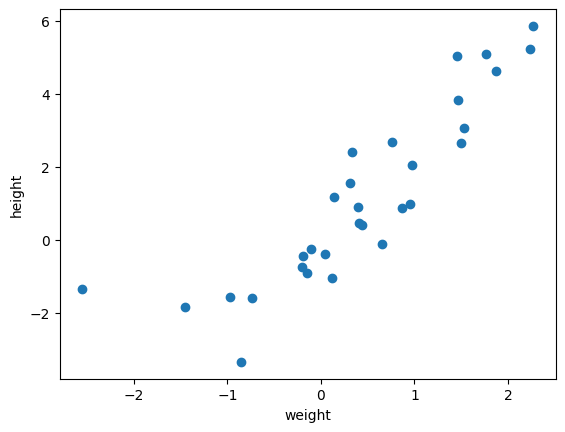

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate random weights (one feature)
X, _ = make_regression(n_samples=30, n_features=1, noise=0.0, random_state=0)
X = np.sort(X, axis=0)  # sort for a nicer plot

# Define a curved relationship (quadratic) and add noise
rng = np.random.RandomState(3)
y = 0.3 * (X.ravel()**2) + 2 * X.ravel() + rng.normal(scale=1.0, size=X.shape[0])

plt.scatter(X, y)
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 1), (9, 1), (21,), (9,))

## High Bias, Low Variance Model (Straight Line)

Simple Model Training Error: 1.56
Simple Model Testing Error: 0.71


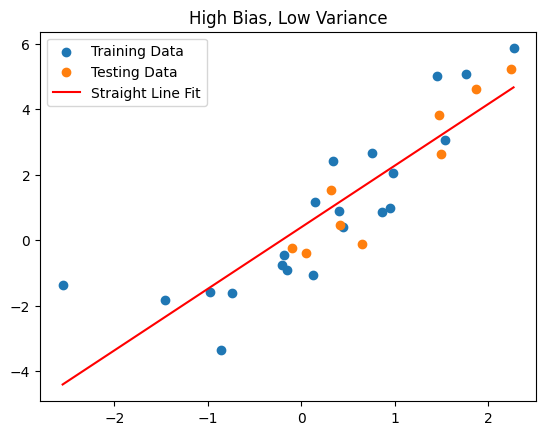

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train a simple linear regression model
model_simple = LinearRegression()
model_simple.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
predictions_simple_train = model_simple.predict(X_train.reshape(-1, 1))
predictions_simple_test = model_simple.predict(X_test.reshape(-1, 1))

# Calculate how well it did on both sets
error_simple_train = mean_squared_error(y_train, predictions_simple_train)
error_simple_test = mean_squared_error(y_test, predictions_simple_test)

print(f"Simple Model Training Error: {error_simple_train:.2f}")
print(f"Simple Model Testing Error: {error_simple_test:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.plot(X, model_simple.predict(X.reshape(-1, 1)), color='red', label='Straight Line Fit')
plt.legend()
plt.title("High Bias, Low Variance")
plt.show()

## High Variance, Low Bias Model (Squiggly Line)
To create a "squiggly line", we can use a high-degree polynomial.

Complex Model Training Error: 0.30
Complex Model Testing Error: 251835.08


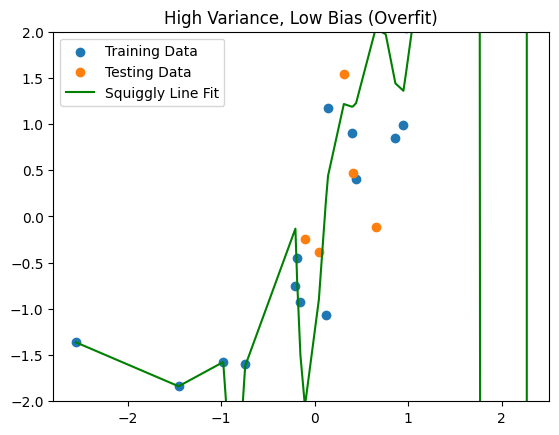

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a very flexible (overfit) model
model_complex = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_complex.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
predictions_complex_train = model_complex.predict(X_train.reshape(-1, 1))
predictions_complex_test = model_complex.predict(X_test.reshape(-1, 1))

# Calculate how well it did on both sets
error_complex_train = mean_squared_error(y_train, predictions_complex_train)
error_complex_test = mean_squared_error(y_test, predictions_complex_test)

print(f"Complex Model Training Error: {error_complex_train:.2f}")
print(f"Complex Model Testing Error: {error_complex_test:.2f}")

# Plot the results
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.plot(X, model_complex.predict(X.reshape(-1, 1)), color='green', label='Squiggly Line Fit')
plt.legend()
plt.title("High Variance, Low Bias (Overfit)")
plt.ylim(-2, 2) # Limit y-axis to see the data and fit better
plt.show()